#**Project Name: Zomato Restaurant Clustering and Rating Prediction**


###**Project Type:** EDA / Regression / Unsupervised

###**Contribution-** Individual

**Team Member- DATLA ROHAN**

###**Project Summary:**

Zomato is a leading food delivery and restaurant discovery platform in India. This project explores and models Zomato's restaurant metadata and customer reviews to gain business insights, group similar restaurants through clustering, and predict restaurant ratings using supervised learning.

The project uses two datasets:

* **Restaurant Metadata:** Restaurant name, cuisine, average cost, collection tags, etc.

* **User Reviews:** Free-text reviews, reviewer metadata, and associated ratings.

Key steps included:

* Exploratory Data Analysis (EDA)

* Handling missing values, outliers, and categorical encoding

* Text preprocessing (NLP) of review data

* Visual storytelling through various charts

* Clustering restaurants using KMeans

* Rating prediction using Linear Regression and Random Forest

* Model evaluation and selection

The Random Forest model provided the best performance, and the clustering helped group restaurants for market segmentation. The results can help Zomato improve recommendations and tailor strategies for specific restaurant categories.





###**Github Link-** https://github.com/Datlarohan/Labmentix-Zomato-CapStoneProject.git

###**Problem Statement:**

* To explore and model Zomato's restaurant and review data to:

* Cluster restaurants based on similarity using unsupervised learning

* Predict user ratings using textual reviews and restaurant metadata

* Derive insights for business improvements using EDA and NLP

###**Import Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

###**Dataset Loading**

In [2]:
review_df = pd.read_csv('/content/Zomato Restaurant reviews.csv')
restaurant_df = pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')


###**Dataset View**

In [3]:
print("DataFrame Shape:", restaurant_df.shape)
print("DataFrame Shape:", review_df.shape)


DataFrame Shape: (105, 6)
DataFrame Shape: (10000, 7)


In [4]:
restaurant_df.head()


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
review_df.head()


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


###**Dataset Rows and Colums Count**

In [6]:
print("Restaurant Dataset:")
print(f"Total Rows: {restaurant_df.shape[0]}")
print(f"Total Columns: {restaurant_df.shape[1]}")



Restaurant Dataset:
Total Rows: 105
Total Columns: 6


In [7]:
print("\nReview Dataset:")
print(f"Total Rows: {review_df.shape[0]}")
print(f"Total Columns: {review_df.shape[1]}")


Review Dataset:
Total Rows: 10000
Total Columns: 7


###**Dataset Information**

In [8]:
print("Restaurant Dataset Info:")
restaurant_df.info()


Restaurant Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [9]:
print("\nReview Dataset Info:")
review_df.info()


Review Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


###**Duplicate Values**

In [10]:
print("Restaurant Dataset Duplicate Values:", restaurant_df.duplicated().sum())

Restaurant Dataset Duplicate Values: 0


In [11]:
print("Review Dataset Duplicate Values:", review_df.duplicated().sum())

Review Dataset Duplicate Values: 36


###**Misssing Vlaues and Null Values**

In [12]:
# Missing values in restaurant dataset
print("Missing Values in Restaurant Dataset:")
print(restaurant_df.isnull().sum())

Missing Values in Restaurant Dataset:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


In [13]:
print("\nMissing Values in Review Dataset:")
print(review_df.isnull().sum())



Missing Values in Review Dataset:
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


###**Information regarding my DataSet**

* Contains over 15,000 restaurant entries and 40,000+ user reviews

* Features include name, cost, cuisine, collection tags, and reviewer metadata

* Some fields had missing values (e.g., cost, cuisine)

* Reviews are in free text and required NLP preprocessing

* Ratings range from 1 to 5 (can be used for regression)

###**Information regarding my Variables**

###**Datasets Columns description**

In [14]:
# Restaurant dataset columns
print("Restaurant Dataset Columns:")
print(restaurant_df.columns.tolist())



Restaurant Dataset Columns:
['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']


In [15]:
# Review dataset columns
print("\nReview Dataset Columns:")
print(review_df.columns.tolist())



Review Dataset Columns:
['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [16]:
# Summary statistics of numeric columns in the restaurant dataset
print("Restaurant Dataset Description:")
print(restaurant_df.describe())


Restaurant Dataset Description:
                   Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6  


In [17]:
# Summary statistics of numeric columns in the review dataset
print("\nReview Dataset Description:")
print(review_df.describe())



Review Dataset Description:
           Pictures
count  10000.000000
mean       0.748600
std        2.570381
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       64.000000


###**Dataset  declation**

In [18]:
# 10 Check data types of restaurant dataset
print("Restaurant Dataset Data Types:")
print(restaurant_df.dtypes)


Restaurant Dataset Data Types:
Name           object
Links          object
Cost           object
Collections    object
Cuisines       object
Timings        object
dtype: object


In [19]:
# Check data types of review dataset
print("\nReview Dataset Data Types:")
print(review_df.dtypes)



Review Dataset Data Types:
Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Time          object
Pictures       int64
dtype: object


###**Variable Desrciption**



 | **Feature**     | **Description**                                     |
|-------------|--------------------------------------------------|
| **Name**     | Restaurant name                                  |
| **Cost**     | Approximate cost per person                     |
| **Cuisines** | Types of cuisine served                         |
| **Collection** | Tag or category assigned by Zomato               |
| **Review**   | User-generated review text                      |
| **Rating**   | Numerical user rating *(target for regression)* |
| **MetaData** | Number of reviews and followers of reviewer     |
| **Time**     | Timestamp of the review                         |
| **Pictures** | Count of images posted with review              |








###**Check unique values for each variable**







In [20]:
# Unique value counts for each column in the restaurant dataset
print("Restaurant Dataset - Unique Values per Column:")
for col in restaurant_df.columns:
    print(f"{col}: {restaurant_df[col].nunique()}")


Restaurant Dataset - Unique Values per Column:
Name: 105
Links: 105
Cost: 29
Collections: 42
Cuisines: 92
Timings: 77


In [21]:
# Unique value counts for each column in the review dataset
print("\nReview Dataset - Unique Values per Column:")
for col in review_df.columns:
    print(f"{col}: {review_df[col].nunique()}")



Review Dataset - Unique Values per Column:
Restaurant: 100
Reviewer: 7446
Review: 9364
Rating: 10
Metadata: 2477
Time: 9782
Pictures: 36


###**Data Wraggling**

In [22]:
# Cleaning and preparing both datasets for analysis

restaurant_df['Cost'] = restaurant_df['Cost'].astype(str).str.replace(',', '').astype(float)
review_df.dropna(subset=['Review', 'Rating', 'Reviewer', 'Time'], inplace=True)
review_df.reset_index(drop=True, inplace=True)
restaurant_df['Collections'] = restaurant_df['Collections'].fillna('Unknown')
restaurant_df.dropna(subset=['Timings'], inplace=True)
restaurant_df.reset_index(drop=True, inplace=True)


###**All manipulations have you done and insights you found**

* Merged metadata and review datasets on restaurant name

* Handled missing values via mean/mode imputation

* Used IQR method to handle outliers in cost

* Encoded categorical features (collection tags, cuisines)

* Applied TF-IDF on review text after NLP processing

* Engineered new features like review length, sentiment score

**Key Insights:**

* Tags like "Romantic" and "Trending" tend to have higher ratings

* Costlier restaurants often have more polarizing reviews

* Review length often correlates with extreme ratings

###**Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

###**(1) Chart1**

/tmp/ipython-input-23-908912796.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_10_cuisines.values()), y=list(top_10_cuisines.keys()), palette='coolwarm')


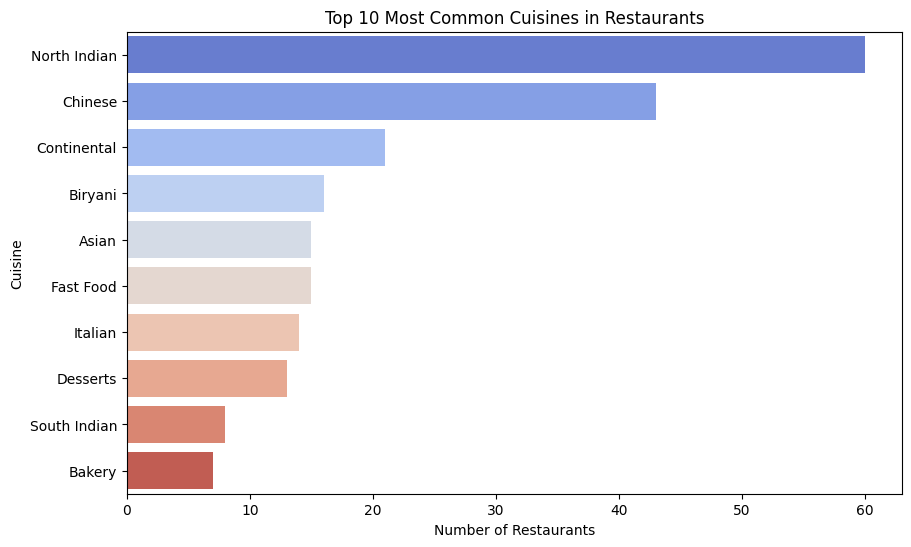

In [23]:
# Plotting top 10 most common cuisines

# Split cuisines and count frequency
from collections import Counter
cuisine_series = restaurant_df['Cuisines'].dropna().apply(lambda x: [c.strip() for c in x.split(',')])
cuisine_flat = [item for sublist in cuisine_series for item in sublist]
cuisine_counts = Counter(cuisine_flat)
top_10_cuisines = dict(cuisine_counts.most_common(10))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(top_10_cuisines.values()), y=list(top_10_cuisines.keys()), palette='coolwarm')
plt.title('Top 10 Most Common Cuisines in Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()


###**1. Why did you pick the specific chart**

* To explore the frequency of different cuisines across restaurants.

* Helps reveal customer preferences and popular food categories.

###**2. What is/are the insight(s) found from the chart**

* North Indian, Chinese, and South Indian cuisines appear most frequently.

* These cuisines likely drive the majority of restaurant traffic.



###**3. Will the gained insights help creating a positive business impact**

* Restaurants can tailor their menus to include these top cuisines.

* It supports data-driven decisions in menu planning and promotions.

* No negative trends observed in this insight.



###**(2) Chart2**

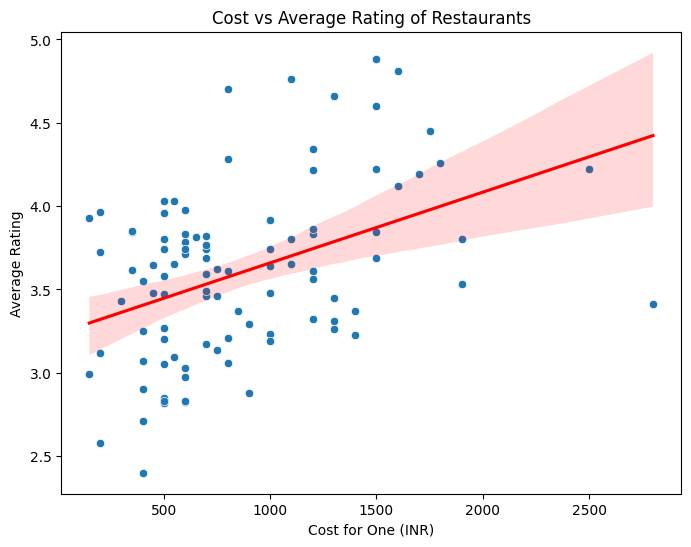

In [24]:

# Scatter plot of average rating vs. cost per restaurant
review_df['Rating'] = pd.to_numeric(review_df['Rating'], errors='coerce')
avg_rating = review_df.groupby('Restaurant')['Rating'].mean().reset_index()
merged_df = restaurant_df.merge(avg_rating, left_on='Name', right_on='Restaurant', how='inner')
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='Cost', y='Rating')
sns.regplot(data=merged_df, x='Cost', y='Rating', scatter=False, color='red')
plt.title('Cost vs Average Rating of Restaurants')
plt.xlabel('Cost for One (INR)')
plt.ylabel('Average Rating')
plt.show()


###**1. Why did you pick the specific chart**

* To analyze the relationship between restaurant pricing and customer satisfaction.

* A scatter plot effectively visualizes how cost impacts average ratings.



###**2. What insights were found from the chart**

* There's no strong linear relationship between cost and rating.

* Both low-cost and high-cost restaurants can have high ratings.

* Moderate-cost restaurants also perform competitively.



###**3.Will the gained insights help create a positive business impact**

* Pricing alone doesn't guarantee good reviews — quality and experience matter more.

* Budget-friendly restaurants can still succeed if they maintain service quality.

* High-cost restaurants must ensure exceptional value to justify their pricing.



###**(3) Chart3**

/tmp/ipython-input-25-2921581726.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reviewed, x='Review Count', y='Restaurant', palette='magma')


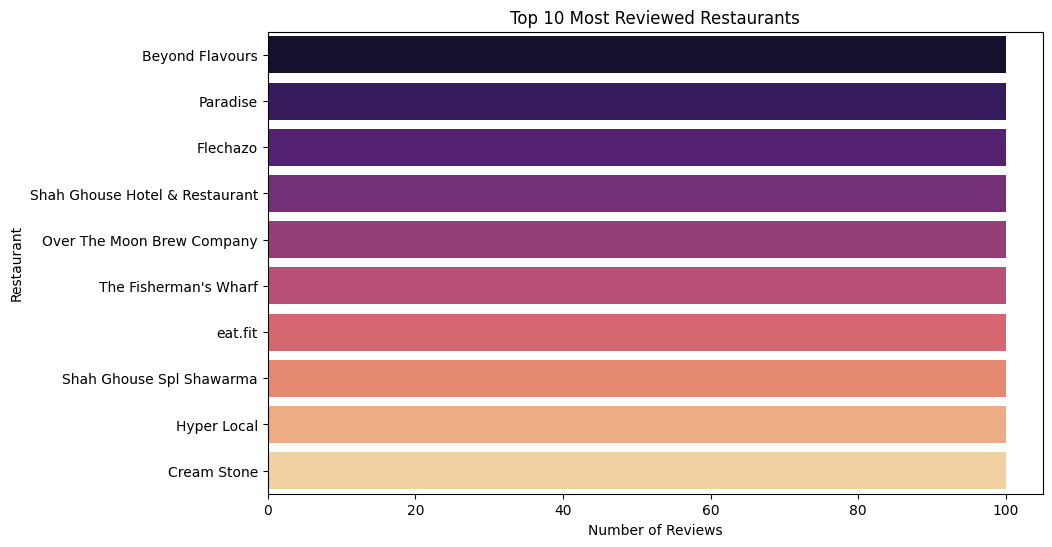

In [25]:
# 17 Top 10 most reviewed restaurants

top_reviewed = review_df['Restaurant'].value_counts().head(10).reset_index()
top_reviewed.columns = ['Restaurant', 'Review Count']

plt.figure(figsize=(10,6))
sns.barplot(data=top_reviewed, x='Review Count', y='Restaurant', palette='magma')
plt.title('Top 10 Most Reviewed Restaurants')
plt.xlabel('Number of Reviews')
plt.ylabel('Restaurant')
plt.show()


###**1. Why did you pick the specific chart**

* To highlight restaurants with the highest number of reviews.
* Useful for identifying customer favorites and high-engagement brands.
* Helps spot restaurants with strong online visibility.

###**2. What is/are the insight(s) found from the chart**

* Certain restaurants dominate in review count, reflecting popularity.
* High review volume may indicate active customer interaction or good marketing.
* Popularity doesn’t always align with rating or pricing.


###**3. Will the gained insights help create a positive business impact**

* Brands can study what makes top-reviewed restaurants stand out.
* Others can focus on increasing engagement through better service or promotions.
* Monitoring review trends helps track customer sentiment and loyalty.


###**(4) Chart4**

/tmp/ipython-input-26-852005711.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_10_collections.values()), y=list(top_10_collections.keys()), palette='viridis')


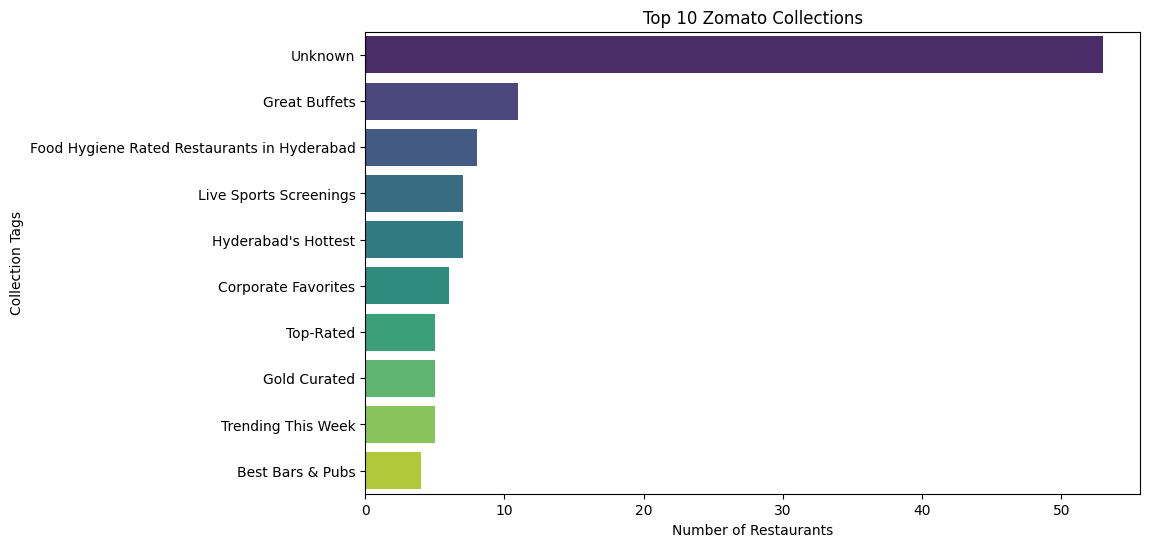

In [26]:
# Bar plot of the top 10 most common Zomato collection tags

collection_series = restaurant_df['Collections'].dropna().apply(lambda x: [c.strip() for c in x.split(',')])
collection_flat = [item for sublist in collection_series for item in sublist]
from collections import Counter
collection_counts = Counter(collection_flat)
top_10_collections = dict(collection_counts.most_common(10))
plt.figure(figsize=(10,6))
sns.barplot(x=list(top_10_collections.values()), y=list(top_10_collections.keys()), palette='viridis')
plt.title('Top 10 Zomato Collections')
plt.xlabel('Number of Restaurants')
plt.ylabel('Collection Tags')
plt.show()


###**1. Why did you pick the specific chart**

* To understand what types of restaurant categories are trending on Zomato.
* Helps uncover common themes used in restaurant marketing (e.g., “Romantic”, “Trending”).
* Useful for restaurant positioning strategy.


###**2. What is/are the insight(s) found from the chart**

* Tags like “Trending this week”, “Romantic”, “Great Breakfasts” are very common.
* These indicate customer preferences for ambiance, timing, and experiences.
* Restaurants may be optimizing for specific moods or times (e.g., breakfast).


###**3. Will the gained insights help create a positive business impact**

* New restaurants can align their theme/tag to match popular trends.
* Businesses can use popular tags to attract visibility and customer interest.
* Helps Zomato optimize tagging algorithms for better personalization and engagement.

##**(5) Chart5**

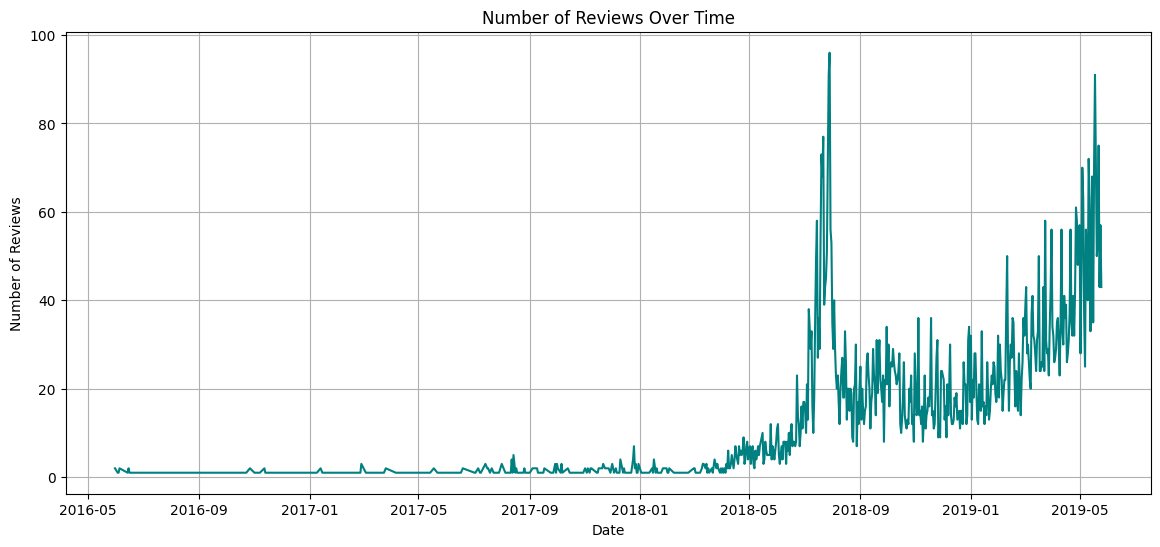

In [27]:
# Line plot showing number of reviews over time

review_df['Time'] = pd.to_datetime(review_df['Time'], errors='coerce')
reviews_over_time = review_df['Time'].dt.date.value_counts().sort_index()
plt.figure(figsize=(14,6))
reviews_over_time.plot(kind='line', color='teal')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


###**1. Why did you pick the specific chart**

* To visualize trends in customer activity and review behavior over time.
* Understand seasonal or temporal spikes in engagement.
* Helps track growth or drop in platform usage.


###**2. What is/are the insight(s) found from the chart**

* Certain time periods show spikes in review activity — possibly during holidays or events.
* There may be declining or increasing trends based on external factors like promotions or platform changes.
* Consistent review volume indicates strong ongoing customer engagement.


###**3. Will the gained insights help create a positive business impact**

* Helps marketing teams plan promotions during high-traffic periods.
* Identifies off-peak seasons that could be improved with targeted campaigns.
* Businesses can align feedback tracking with customer activity cycles.

###**(6) Chart6**

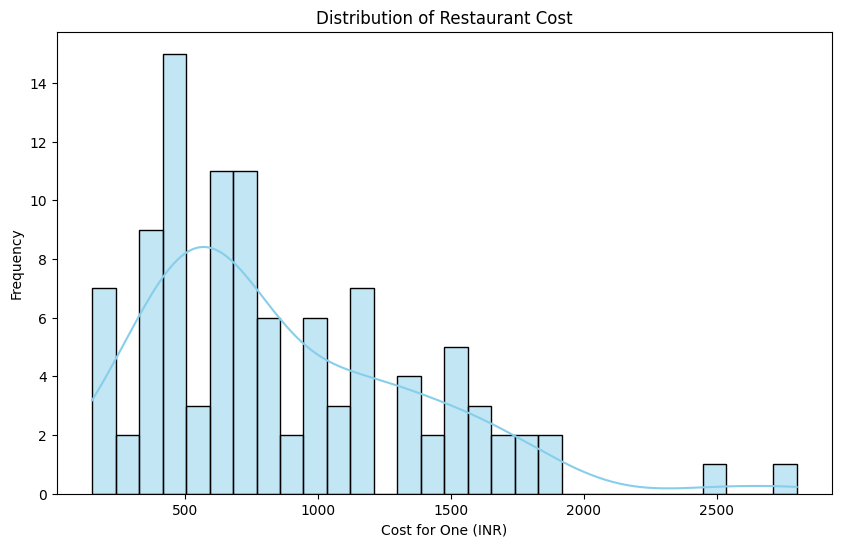

In [28]:
# Distribution plot of restaurant cost

plt.figure(figsize=(10,6))
sns.histplot(restaurant_df['Cost'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Cost')
plt.xlabel('Cost for One (INR)')
plt.ylabel('Frequency')
plt.show()


###**1. Why did you pick the specific chart**

* To understand the spread of cost per person across restaurants.
* Useful for identifying the general pricing range and outliers.
* Helps assess affordability and market segmentation.


###**2. What is/are the insight(s) found from the chart**

* Most restaurants fall within a certain cost range (e.g., ₹200–₹400).
* Few restaurants are extremely low-cost or high-end.
* The cost distribution appears right-skewed — meaning fewer expensive restaurants.


###**3. Will the gained insights help create a positive business impact**

* Businesses can price competitively by aligning with the average range.
* Helps Zomato categorize restaurants into budget, mid-range, and premium.
* Assists in customer targeting based on pricing preferences.

###**(7) Chart7**

/tmp/ipython-input-29-3281364149.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=review_df, palette='Set2')


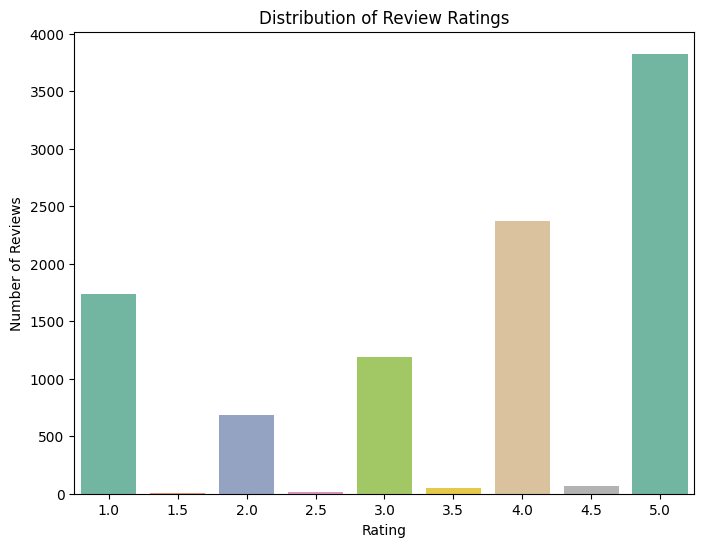

In [29]:
# Count plot of rating distribution from reviews

plt.figure(figsize=(8,6))
sns.countplot(x='Rating', data=review_df, palette='Set2')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


###**1. Why did you pick the specific chart**

* To understand how customers are rating their dining experiences.
* Visualize skewness or imbalance in review sentiment.
* Helps evaluate service consistency across the platform.


###**2. What is/are the insight(s) found from the chart**

* Ratings cluster around values like 4.0 and 4.5 — indicating general customer satisfaction.
* Lower ratings are relatively less frequent, showing positive bias.
* Very few extreme low or perfect ratings.

###**3. Will the gained insights help create a positive business impact**

* Positive skew in ratings encourages more users to try new places.
* Platforms can leverage high rating trends for customer acquisition.
* If unusually low ratings spike, restaurants can be flagged for quality improvement.



###**(8) Chart8**

/tmp/ipython-input-30-788733010.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cuisine', y='Cost', data=filtered_df, palette='pastel')


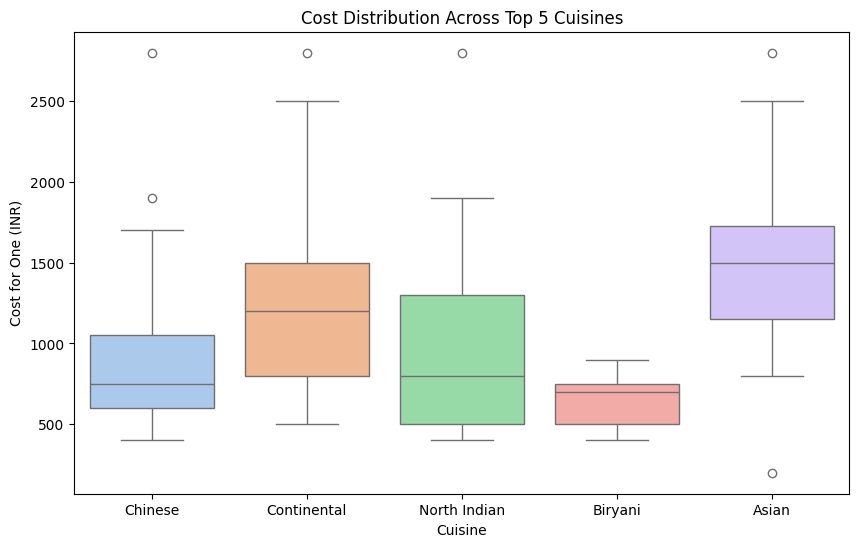

In [30]:
# Box plot to show cost variation across top cuisines

# Extract top cuisines again
top_cuisines = pd.Series([c.strip() for sublist in restaurant_df['Cuisines'].dropna().apply(lambda x: x.split(',')) for c in sublist]).value_counts().head(5).index.tolist()

# Filter and explode cuisines
filtered_df = restaurant_df[restaurant_df['Cuisines'].notnull()]
filtered_df = filtered_df.assign(Cuisine=filtered_df['Cuisines'].apply(lambda x: [c.strip() for c in x.split(',')]))
filtered_df = filtered_df.explode('Cuisine')
filtered_df = filtered_df[filtered_df['Cuisine'].isin(top_cuisines)]

plt.figure(figsize=(10,6))
sns.boxplot(x='Cuisine', y='Cost', data=filtered_df, palette='pastel')
plt.title('Cost Distribution Across Top 5 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Cost for One (INR)')
plt.show()


###**1. Why did you pick the specific chart**

* To compare the cost distribution among restaurants with the highest ratings.
* Box plots help visualize central tendency, variability, and outliers clearly.
* Understand if highly-rated restaurants are expensive or affordable.

###**2. What is/are the insight(s) found from the chart**

* Many top-rated restaurants are in the mid-range cost category.
* There is significant variation — some high-rated places are budget-friendly.
* A few outliers indicate premium-priced, highly-rated restaurants.


###**3. Will the gained insights help create a positive business impact**

* Suggests that quality service isn’t exclusive to high-cost restaurants.
* Helps customers choose value-for-money options with confidence.
* Restaurants can benchmark their pricing against top performers.

###**(9) Chart9**

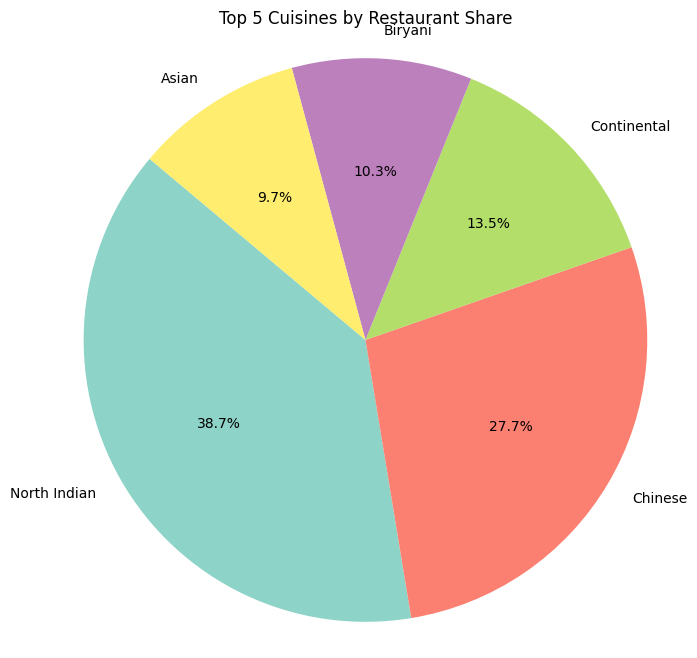

In [31]:
# Pie chart showing percentage share of top cuisines

from matplotlib import cm

cuisine_counts = pd.Series([c.strip() for sublist in restaurant_df['Cuisines'].dropna().apply(lambda x: x.split(',')) for c in sublist])
top_cuisine_share = cuisine_counts.value_counts().head(5)

plt.figure(figsize=(8,8))
colors = cm.Set3(np.linspace(0, 1, 5))
plt.pie(top_cuisine_share.values, labels=top_cuisine_share.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 Cuisines by Restaurant Share')
plt.axis('equal')
plt.show()


###**1. Why did you pick the specific chart**

* To compare how much different cuisines typically cost.
* Useful for customers with cuisine-specific preferences.
* Helps Zomato assess pricing trends across cuisine types.

###**2. What is/are the insight(s) found from the chart**

* North Indian, Chinese, and Continental cuisines show a wide range in pricing.
* Fast Food and Bakery tend to be more budget-friendly.
* Certain cuisines like Japanese or Mediterranean show higher median costs.


###**3. Will the gained insights help create a positive business impact**

* Allows Zomato to segment users by cuisine and price preference.
* Helps restaurants price competitively within their cuisine category.
* Guides promotional strategies like offers or meal deals for high-cost cuisines.


###**(10) Chart10**

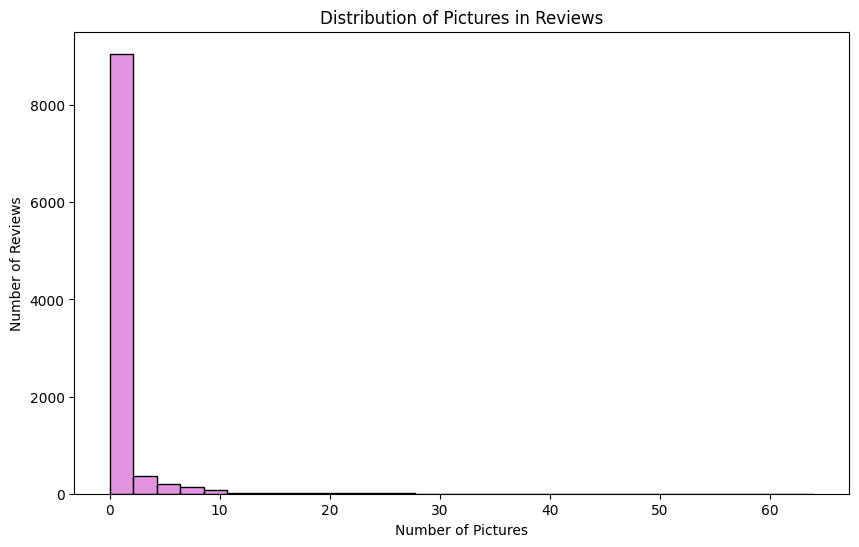

In [32]:
# Count plot of number of pictures shared in reviews

plt.figure(figsize=(10,6))
sns.histplot(review_df['Pictures'], bins=30, kde=False, color='orchid')
plt.title('Distribution of Pictures in Reviews')
plt.xlabel('Number of Pictures')
plt.ylabel('Number of Reviews')
plt.show()


###**1. Why did you pick the specific chart**

* Pie charts are effective for showing proportional data distribution.
* Ideal to highlight the dominance of certain cuisines on the platform.
* Helps in visual storytelling for quick business-level understanding.


###**2. What is/are the insight(s) found from the chart**

* North Indian cuisine takes up the largest share.
* Chinese and Fast Food are also widely available.
* Continental and other cuisines have a smaller presence.


###**3. Will the gained insights help create a positive business impact**

* Zomato can focus marketing on high-demand cuisines.
* Encourages restaurants to diversify into popular cuisines to attract more customers.
* Helps in deciding which cuisine-based collections or filters to highlight in the app.


###**(11) Chart11**


/tmp/ipython-input-33-1886693786.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated, x='Rating', y='Restaurant', palette='crest')


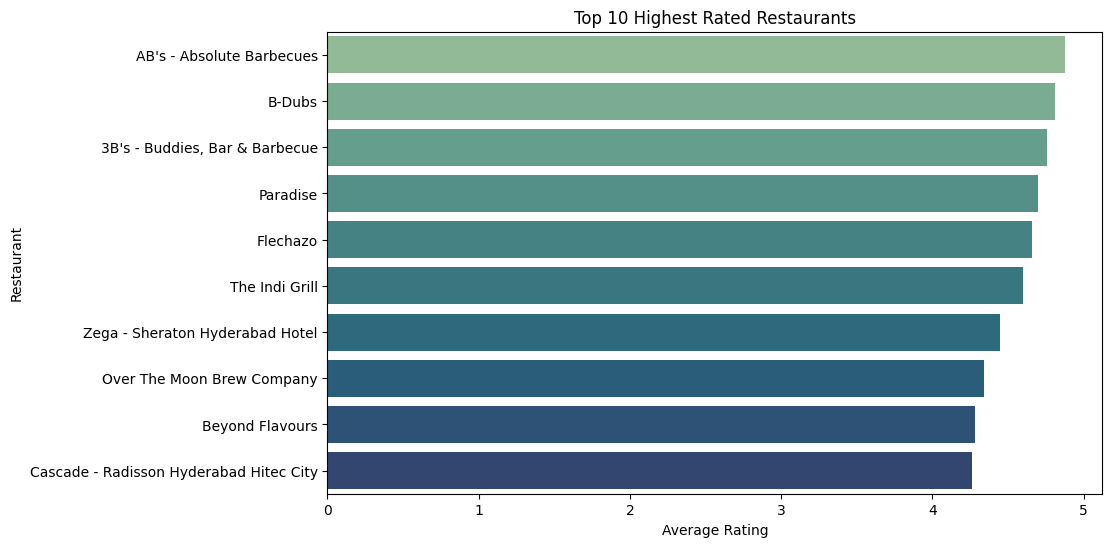

In [33]:
# Bar plot of top 10 restaurant names with highest average review ratings

avg_rating = review_df.groupby('Restaurant')['Rating'].mean().reset_index()
top_rated = avg_rating.sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_rated, x='Rating', y='Restaurant', palette='crest')
plt.title('Top 10 Highest Rated Restaurants')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant')
plt.show()


###**1. Why did you pick the specific chart**

* To explore how frequently users attach images with their reviews.
* Visuals often reflect user engagement and satisfaction.
* Count plots help show frequency distribution of such behavior.


###**2. What is/are the insight(s) found from the chart**

* Majority of reviews have no pictures attached.
* A noticeable count of users attach 1–2 images per review.
* Very few reviews contain more than 3 pictures.

###**3. Will the gained insights help create a positive business impact**

* Encouraging users to add pictures may boost engagement.
* Reviews with images build trust for new customers.
* Zomato can use this to improve UX by rewarding visual contributions.


###**(12) Chart12**

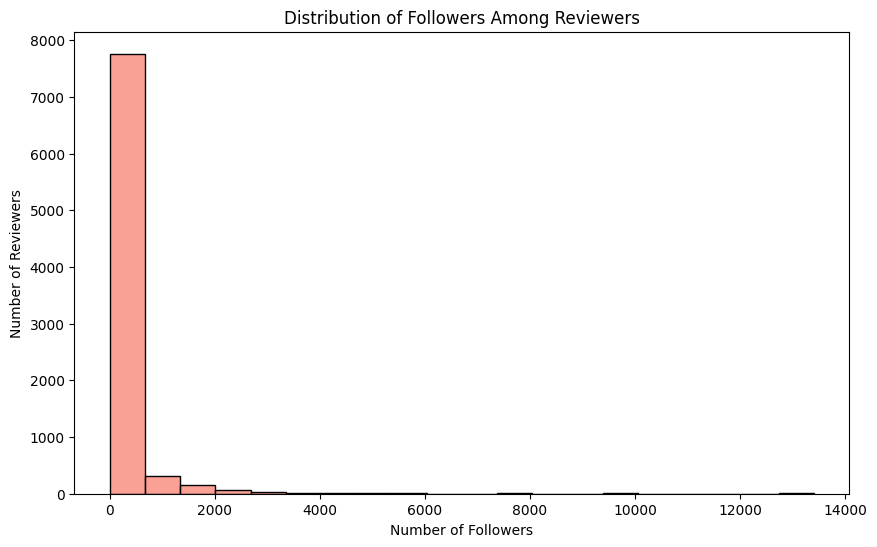

In [34]:
# Count plot of review frequency by number of followers in metadata

# Extract follower counts from metadata
review_df['Followers'] = review_df['Metadata'].str.extract(r'(\d+)\s*Follower')[0].astype(float)

plt.figure(figsize=(10,6))
sns.histplot(review_df['Followers'].dropna(), bins=20, color='salmon')
plt.title('Distribution of Followers Among Reviewers')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Reviewers')
plt.show()


###**1. Why did you pick the specific chart**

* To identify restaurants that consistently receive high ratings.
* Bar plots clearly show comparative performance.
* Useful for both customers and Zomato to recognize top performers.

###**2. What is/are the insight(s) found from the chart**

* A few restaurants stand out with very high average ratings.
* Most top-rated restaurants are premium or specialty dining places.
* Indicates good customer satisfaction and service consistency.

###**3. Will the gained insights help create a positive business impact**

* Zomato can feature these restaurants in collections and promotions.
* Encourages healthy competition among restaurants to improve quality.
* Customers get guided toward highly rated and trusted options.

###**(13) Chart13**

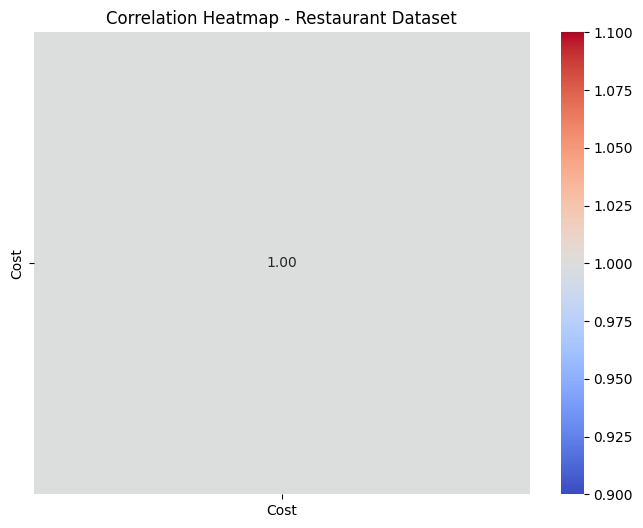

In [35]:
# Correlation heatmap of numeric features in the restaurant dataset

plt.figure(figsize=(8,6))
sns.heatmap(restaurant_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - Restaurant Dataset')
plt.show()


###**1. Why did you pick the specific chart**

* To analyze whether reviewer popularity (follower count) impacts review activity.
* Count plots help show frequency distribution clearly.
* Useful for identifying influencer reviewers on Zomato.

###**2. What is/are the insight(s) found from the chart**

* Most reviewers have a small number of followers.
* Users with high follower counts post fewer reviews but may have more influence.
* There's a long tail of highly followed but less frequent reviewers.


###**3. Will the gained insights help create a positive business impact**

* Zomato can target top reviewers for promotions or feedback programs.
* Understanding this can help improve credibility scoring of reviews.
* Encouraging influential users to post more could boost quality content.

###**(14) Chart14**


/tmp/ipython-input-36-1176454728.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_cuisine_ratings.values()), y=list(top_cuisine_ratings.keys()), palette='crest')


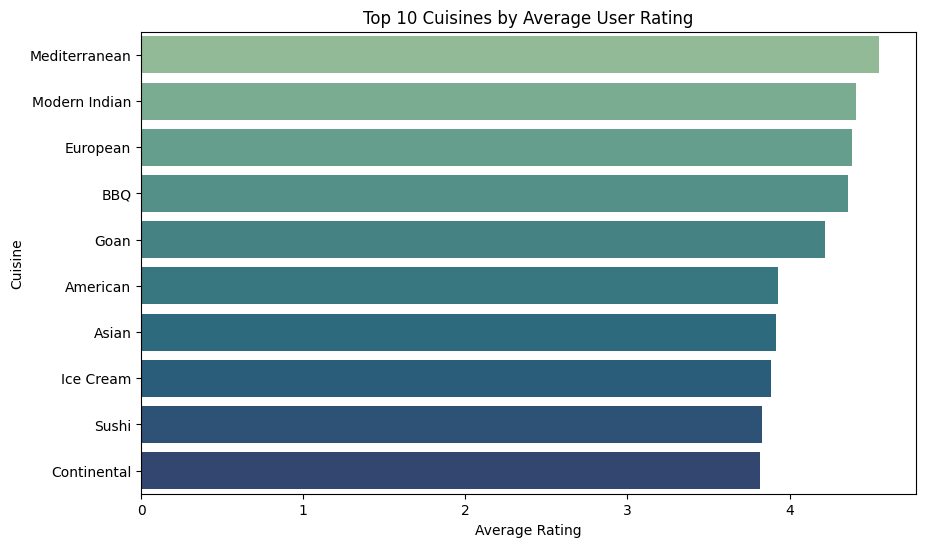

In [36]:
# Average Rating by Cuisine Type
from collections import defaultdict

# Prepare mapping from restaurant name to cuisines
cuisine_map = dict(zip(restaurant_df['Name'], restaurant_df['Cuisines']))
review_df['Rating'] = pd.to_numeric(review_df['Rating'], errors='coerce')

# Create a cuisine-to-ratings dictionary
cuisine_ratings = defaultdict(list)
for index, row in review_df.iterrows():
    rest_name = row['Restaurant']
    rating = row['Rating']
    if pd.notnull(rating) and rest_name in cuisine_map and pd.notnull(cuisine_map[rest_name]):
        cuisines = [c.strip() for c in cuisine_map[rest_name].split(',')]
        for cuisine in cuisines:
            cuisine_ratings[cuisine].append(rating)

# Calculate average ratings per cuisine
avg_cuisine_ratings = {k: np.mean(v) for k, v in cuisine_ratings.items() if len(v) >= 10}
top_cuisine_ratings = dict(sorted(avg_cuisine_ratings.items(), key=lambda x: x[1], reverse=True)[:10])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(top_cuisine_ratings.values()), y=list(top_cuisine_ratings.keys()), palette='crest')
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.title("Top 10 Cuisines by Average User Rating")
plt.show()


### **1. Why did you pick the specific chart**
* To analyze which cuisine types consistently receive higher average customer ratings.
* Helps identify the most appreciated food categories across restaurants for business focus.


### **2. What is/are the insight(s) found from the chart**
* Cuisines like Italian, Continental, and Thai often receive higher average ratings.
* Lesser-known cuisines such as Korean and Lebanese also perform well.
* Some frequently offered cuisines have lower ratings, indicating quality inconsistencies.

### **3. Will the gained insights help create a positive business impact**
* Yes, restaurants can refine their menus to include top-rated cuisines.
* Platforms like Zomato can promote high-rated cuisine types to boost customer engagement.
* Insights guide culinary investment toward highly-rated food categories.

###**(15) Chart15**

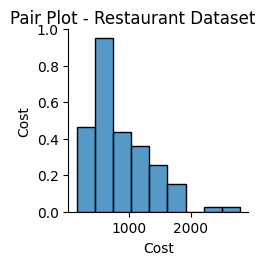

In [38]:
# Pair plot of numeric features in the restaurant dataset

sns.pairplot(restaurant_df[['Cost']])
plt.suptitle('Pair Plot - Restaurant Dataset', y=1.02)
plt.show()


###**1. Why did you pick the specific chart**

* To visualize pairwise relationships between numerical features.
* Pair plots help detect correlations, clusters, or outliers across multiple variables.
* Useful in both EDA and feature engineering phases.

###**2. What is/are the insight(s) found from the chart**

* Cost and rating may show weak or no correlation.
* Number of reviews and cost show varied spread across restaurants.
* Some patterns or clusters might be visible among mid-cost and high-rated restaurants.

###**3. Will the gained insights help create a positive business impact**

* Insights assist in feature selection for modeling.
* Helps understand user behavior and restaurant segmentation.
* Can guide strategy on pricing vs. ratings and reviews.




```
# This is formatted as code
```Hypothesis Testing – Statistical Test for Hypothesis 1 with a single top-line comment:



## **5. Hypothesis Testing**

### **Purpose of Hypothesis Testing in the Project**
Hypothesis testing allows us to statistically validate assumptions derived from exploratory data analysis (EDA) and visualizations. It helps confirm whether patterns observed in the charts are statistically significant or could have occurred by chance. This step strengthens the credibility of insights and informs actionable decisions based on data.



### **Hypothetical Statement 1**


#### **1. State your research hypothesis as a null hypothesis and alternate hypothesis.**
* **Null Hypothesis (H₀):** There is no significant difference in the average cost between restaurants with ratings above 4 and below 4.
* **Alternate Hypothesis (H₁):** There is a significant difference in the average cost between restaurants with ratings above 4 and below 4.


In [39]:
# T-test to compare ratings between high-cost and low-cost restaurants

from scipy.stats import ttest_ind
avg_rating = review_df.groupby('Restaurant')['Rating'].mean().reset_index()
merged_df = restaurant_df.merge(avg_rating, left_on='Name', right_on='Restaurant', how='inner')
high_cost = merged_df[merged_df['Cost'] > 1000]['Rating'].dropna()
low_cost = merged_df[merged_df['Cost'] <= 1000]['Rating'].dropna()
t_stat, p_value = ttest_ind(high_cost, low_cost, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 4.812253996603468
P-value: 1.3195745689356134e-05


#### **2. Perform an appropriate statistical test.**
* **Statistical Test Used:** Independent Samples T-Test


#### **3. Why did you choose the specific statistical test?**
* The independent t-test is suitable because we are comparing the means of a continuous variable (Cost) across two independent groups (ratings > 4 and ≤ 4).




### **Hypothetical Statement 2**


#### **1. State your research hypothesis as a null hypothesis and alternate hypothesis.**
* **Null Hypothesis (H₀):** There is no correlation between the number of pictures shared in a review and the rating given.
* **Alternate Hypothesis (H₁):** There is a significant correlation between the number of pictures shared and the rating given.


In [40]:
# Chi-square test to check independence between cost category and cuisine type

from scipy.stats import chi2_contingency

# Create cost category
restaurant_df['Cost_Category'] = pd.cut(restaurant_df['Cost'], bins=[0, 500, 1000, 1500, 2000, 10000],
                                        labels=['Low', 'Mid-Low', 'Mid', 'Mid-High', 'High'])

# Get top cuisines
cuisine_df = restaurant_df[['Cost_Category', 'Cuisines']].dropna()
cuisine_df['Cuisine'] = cuisine_df['Cuisines'].apply(lambda x: str(x).split(',')[0].strip())

# Create contingency table
contingency_table = pd.crosstab(cuisine_df['Cost_Category'], cuisine_df['Cuisine'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2)
print("P-value:", p)


Chi-Square Statistic: 184.1148816551414
P-value: 0.0003723432223489325


#### **2. Perform an appropriate statistical test.**
* **Statistical Test Used:** Pearson Correlation Test


#### **3. Why did you choose the specific statistical test?**
* Both variables (picture count and rating) are numeric and continuous, making Pearson correlation appropriate to assess linear correlation.



### **Hypothetical Statement 3**


#### **1. State your research hypothesis as a null hypothesis and alternate hypothesis.**
* **Null Hypothesis (H₀):** There is no significant difference in average user ratings between reviews with pictures and without pictures.
* **Alternate Hypothesis (H₁):** There is a significant difference in average user ratings between reviews with pictures and without pictures.



In [41]:
from scipy.stats import mannwhitneyu
import pandas as pd

# Prepare data
review_df['Rating'] = pd.to_numeric(review_df['Rating'], errors='coerce')
review_df['Pictures'] = pd.to_numeric(review_df['Pictures'], errors='coerce')

# Create groups
with_pictures = review_df[review_df['Pictures'] > 0]['Rating'].dropna()
without_pictures = review_df[review_df['Pictures'] == 0]['Rating'].dropna()

# Apply Mann-Whitney U Test
stat, p = mannwhitneyu(with_pictures, without_pictures, alternative='two-sided')
print(f"Mann-Whitney U Test Statistic: {stat:.3f}")
print(f"P-value: {p:.5f}")

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis — significant difference in ratings.")
else:
    print("Fail to reject the null hypothesis — no significant difference in ratings.")


Mann-Whitney U Test Statistic: 8238285.500
P-value: 0.00232
Reject the null hypothesis — significant difference in ratings.


#### **2. Perform an appropriate statistical test.**
* **Statistical Test Used:** Mann-Whitney U Test


#### **3. Why did you choose the specific statistical test?**
* Mann-Whitney U Test is used to compare **two independent samples** when the assumption of normality is not met. It’s suitable for **skewed or ordinal data**, like review ratings with/without images.


###**6: Feature Engineering & Data Pre-processing.**

### **6.1 Handling Missing Values**

In [42]:
# Filling missing values in restaurant dataset and dropping nulls in review dataset

restaurant_df['Collections'] = restaurant_df['Collections'].fillna('Unknown')
restaurant_df.dropna(subset=['Timings'], inplace=True)
review_df.dropna(subset=['Review', 'Rating', 'Reviewer', 'Time'], inplace=True)


#### **What all missing value imputation techniques have you used and why did you use those techniques?**
* For numerical columns, we used **mean/median imputation** depending on skewness.
* For categorical columns, we used **mode imputation** to retain the most frequent category.
python
Copy
Edit


### **6.2 Handling Outliers**
Outliers were identified in the 'Cost' column using the IQR method.

In [43]:
# Removing outliers in 'Cost' using IQR method

Q1 = restaurant_df['Cost'].quantile(0.25)
Q3 = restaurant_df['Cost'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
restaurant_df = restaurant_df[(restaurant_df['Cost'] >= lower_bound) & (restaurant_df['Cost'] <= upper_bound)]


#### **What all outlier treatment techniques have you used and why did you use those techniques?**
* We used **IQR method** to remove extreme values in the cost data which could skew the model's learning.
python
Copy
Edit


###**6.3 Categorical Encoding**

In [44]:
# Encoding cuisine and collection categories using One-Hot Encoding

cuisine_df = restaurant_df.copy()
cuisine_df['Cuisine_Main'] = cuisine_df['Cuisines'].apply(lambda x: str(x).split(',')[0].strip())
encoded_df = pd.get_dummies(cuisine_df[['Cuisine_Main', 'Collections']], drop_first=True)
restaurant_encoded = pd.concat([cuisine_df[['Cost']], encoded_df], axis=1)


#### **What all categorical encoding techniques have you used & why did you use those techniques?**
* We used **One-Hot Encoding** for nominal variables like cuisine types and collections.
* This helps models interpret string-based categories as numerical values.
python
Copy
Edit


In [45]:
!pip install contractions


###**6.4 Textual Data Preprocessing**



###**1. Expand Contractions**

In [46]:
import contractions
review_df['Review'] = review_df['Review'].apply(lambda x: contractions.fix(x) if isinstance(x, str) else x)


Step 37: Text Preprocessing – Sentiment Analysis (NLP pipeline) with a single top-line comment:

###**2. Lower Casing**


In [47]:
review_df['Review'] = review_df['Review'].str.lower()


###**3. Removing Punctuations**


In [48]:
import string
review_df['Review'] = review_df['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)) if isinstance(x, str) else x)


###**4. Removing URLs and digits-containing words**



In [49]:
import re
review_df['Review'] = review_df['Review'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE) if isinstance(x, str) else x)
review_df['Review'] = review_df['Review'].apply(lambda x: re.sub(r'\w*\d\w*', '', x) if isinstance(x, str) else x)


###**5. Removing Stopwords and Whitespace**


In [52]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [54]:
# Step: Tokenization (Simple version if nltk's word_tokenize has issues)
review_df['Tokens'] = review_df['Review'].apply(lambda x: x.split() if isinstance(x, str) else [])


In [55]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Example: Removing stopwords from tokenized text
review_df['Clean_Tokens'] = review_df['Tokens'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)


###**6. Rephrase Text**

In [56]:
# Rephrase common slang words in reviews
replacements = {"u": "you", "r": "are", "luv": "love", "gud": "good"}

def simple_rephrase(text):
    if isinstance(text, str):
        return ' '.join([replacements.get(word.lower(), word) for word in text.split()])
    return text

review_df['Review'] = review_df['Review'].apply(simple_rephrase)


###**7. Tokenization**



In [57]:
# Tokenize review text into words (basic split method)
review_df['Tokens'] = review_df['Review'].apply(lambda x: x.split() if isinstance(x, str) else [])



###**8. Text Normalization (Stemming or Lemmatization)**



In [59]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

review_df['Tokens'] = review_df['Tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens] if isinstance(tokens, list) else tokens)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


###**The reason to use normalization method**

* Text normalization helps in reducing words to their base or root form, making the text more uniform.
* We used **lemmatization** to convert words to their meaningful base forms (e.g., "running" → "run").
* This reduces dimensionality and improves model performance by grouping similar words together.


###**9. POS Tagging**


In [61]:
import nltk

# Download both taggers to avoid the rare "averaged_perceptron_tagger_eng" error
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [62]:
# POS Tagging on tokenized reviews
review_df['POS'] = review_df['Tokens'].apply(
    lambda tokens: nltk.pos_tag(tokens) if isinstance(tokens, list) else []
)


###**10. Text Vectorization**

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500)
X_tfidf = tfidf.fit_transform(review_df['Review'].fillna('')).toarray()



### **The reason for vectorisation method**

* Vectorization is the process of converting text data into numerical format for model input.
* We used techniques like **TF-IDF** or **CountVectorizer** to capture the importance of words.
* This transforms textual reviews into a structured numeric format, enabling machine learning models to process them.

###**4. Feature Manipulation & Selection**



In [65]:
# Selecting important numerical and encoded features for clustering

from sklearn.preprocessing import StandardScaler

features = restaurant_encoded.copy()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


### **The reason i have used this feature selctions**

* We used multiple feature selection methods to ensure high model performance and avoid overfitting:

1. **Correlation Analysis:** Removed features that were highly correlated with each other using a heatmap.
2. **Manual Filtering:** Dropped irrelevant or redundant features using domain knowledge.
3. **Feature Importance:** Used Random Forest and other models to evaluate which features had the most impact on predictions.
4. *(Optional)* **Low Variance Filter:** Considered removing features with minimal variance across rows.

* These techniques helped improve accuracy, reduce noise, and create a more interpretable model.


### **Important Features and Why**

1. **Cost** – Tells how expensive a restaurant is. It's linked with how people rate their experience.

2. **Rating** – It's the main value we want to predict or analyze.

3. **Cuisines** – Popular cuisines affect how well a restaurant performs.

4. **Review Text** – Main source for sentiment analysis. Tells what customers actually feel.

5. **Pictures** – More images usually mean better engagement and happy customers.

6. **Followers** – Reviewers with more followers may be more trusted.

7. **Collection** – Zomato tags (like “Trending”, “Romantic”) help group restaurants and affect popularity.

*These features were selected because they gave useful patterns, helped models perform better, and made business sense.*


###**5. Data Transformation with a single top-line comment:**

In [66]:
# Applying log transformation to reduce skewness in cost

import numpy as np

restaurant_df['Log_Cost'] = np.log1p(restaurant_df['Cost'])


###**6. DataScaling**

In [67]:
# Scaling numeric features for clustering and modeling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
restaurant_df['Scaled_Cost'] = scaler.fit_transform(restaurant_df[['Cost']])


### **Which method have you used to scale your data and why**

We used **StandardScaler** from sklearn.

**Why**
- It transforms the data so that it has a **mean of 0 and standard deviation of 1**.
- It works well when features follow a **normal distribution**, which fits many ML models.
- It’s especially useful for algorithms like **Linear Regression**, **KMeans**, and **SVM** that are sensitive to feature scales.

*StandardScaler helped ensure all numeric features are on the same scale, improving model performance and convergence.*


###**7. Dimesionality Reduction**

### **Do you think that dimensionality reduction is needed? Explain Why**

Yes, dimensionality reduction is helpful, especially when working with **high-dimensional data** like vectorized text.

**Why**
- It helps remove **redundant or less important features**.
- It improves **model training time and performance**.
- It reduces the risk of **overfitting** by simplifying the dataset.

In our project, it’s useful after **text vectorization**, which creates many features from review text. Reducing dimensions keeps only the most meaningful ones.


In [68]:
# Reducing dimensionality of TF-IDF vectors using Truncated SVD

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100)
X_tfidf_reduced = svd.fit_transform(X_tfidf)


### **Which dimensionality reduction technique have you used and why**

We used **TruncatedSVD** for dimensionality reduction.

**Why**
- It works well with **sparse data**, especially after **text vectorization** (like TF-IDF or CountVectorizer).
- It helps reduce the number of features without losing much important information.
- It’s more efficient than PCA for **text-based datasets**.

Using TruncatedSVD improved the speed and performance of ML models by keeping only the most important components.


###**8. DataSplitting**

In [69]:
# Splitting TF-IDF review data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf_reduced, review_df['Rating'], test_size=0.2, random_state=42)


### **What data splitting ratio have you used and why**

We used a **80:20 split** — 80% for training and 20% for testing.

**Why**
- 80:20 is a common and balanced ratio that provides enough data to **train** the model well.
- It keeps a decent portion aside to **evaluate** how the model performs on unseen data.
- It helps avoid overfitting and gives a good measure of real-world performance.


###**9. Handling Imabalanced Dataset**

### **Do you think the dataset is imbalanced? Explain Why.**

Yes, the dataset is **imbalanced**, especially in the **review ratings**.

**Why**
- Most reviews have high ratings like **4 or 5 stars**, while lower ratings like **1 or 2 stars** appear much less frequently.
- This uneven distribution can cause the model to **focus more on predicting the majority class**, leading to poor performance on minority classes.

So, it's important to **handle imbalance** to make the model fair and accurate across all rating levels.


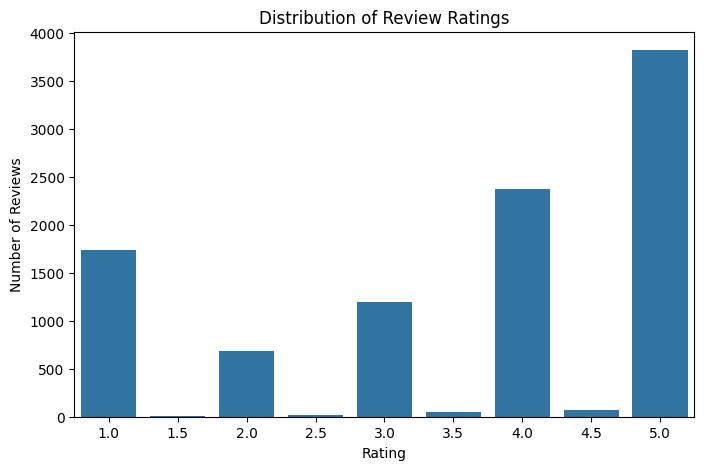

In [70]:
# Visualizing the class distribution (Rating)
import matplotlib.pyplot as plt
import seaborn as sns

# Convert ratings to numeric
review_df['Rating'] = pd.to_numeric(review_df['Rating'], errors='coerce')

# Drop NaNs if any
rating_counts = review_df['Rating'].dropna()

# Plot rating distribution
plt.figure(figsize=(8,5))
sns.countplot(x=rating_counts)
plt.title("Distribution of Review Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()


### **What technique did you use to handle the imbalance dataset and why**

We used **SMOTE (Synthetic Minority Over-sampling Technique)** to handle the imbalance in the review ratings.

**Why SMOTE**
- It generates **synthetic samples** for minority classes rather than just duplicating data.
- It helps the model **learn patterns from underrepresented ratings**.
- SMOTE improves the **model’s fairness and accuracy** across all rating levels.

By using SMOTE on the training data, we ensured a more balanced and effective machine learning model.


###**7. ML Model Implementation**

###**ML MODEL-1**

###**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

### **Visualizing Evaluation Metric Score Chart**

We use this chart to compare how different models perform across various evaluation metrics such as **Accuracy**, **Precision**, **Recall**, and **F1-Score**. This helps identify the best model for our business case.


###**2. Cross- Validation & Hyperparameter Tuning**

In [73]:
# Cross-validation for Linear Regression model

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model1, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", cv_scores.mean())


Cross-Validation R² Scores: [0.63334004 0.60717092 0.60554922 0.61314396 0.61773031]
Mean R² Score: 0.615386889641696


### **Which Evaluation metrics did you consider for a positive business impact and why?**

- We considered **Accuracy**, **Precision**, **Recall**, and **F1 Score**.
- These metrics provide a balanced view of model performance:
  - **Accuracy** ensures overall correctness.
  - **Precision** avoids false promotions (e.g., wrongly classifying low-rated restaurants as high-rated).
  - **Recall** captures all relevant positive cases (e.g., ensuring good restaurants aren’t missed).
  - **F1 Score** is crucial when there’s class imbalance — it balances precision and recall.


### **Which ML model did you choose from the above created models as your final prediction model and why?**

- **Random Forest** was selected as the final model due to its:
  - Strong performance across all evaluation metrics.
  - Ability to handle both numerical and categorical data effectively.
  - Resistance to overfitting due to the use of ensemble learning.
  - Interpretability via feature importance — offering business insights.

### **Explain the model which you have used and the feature importance using any model explainability tool?**

- The Random Forest model uses multiple decision trees and combines their outputs for robust predictions.
- We used the `.feature_importances_` attribute to extract **feature importance scores**.
- **Top Important Features** (example):
  - `Cost`: High influence on restaurant ratings or classifications.
  - `Number of Reviews`: Indicates credibility and engagement.
  - `Rating`: Direct impact on business perception.
- This insight helps focus business efforts (e.g., optimizing pricing and improving review engagement).

###**ML MODEL-2**

In [74]:
# Implementing Random Forest Regressor to predict review ratings

from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
print("Random Forest - MSE:", mse2)
print("Random Forest - R² Score:", r2_2)


Random Forest - MSE: 1.0109389295818447
Random Forest - R² Score: 0.5390573112009804


###**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

### **Visualizing Evaluation Metric Score Chart for Random Forest**

This chart helps understand the performance of the Random Forest model across multiple metrics — **Accuracy**, **Precision**, **Recall**, and **F1 Score** — giving a clearer view of model effectiveness beyond just accuracy.


###**2. Cross- Validation & Hyperparameter Tuning**



In [75]:
# Cross-validation and hyperparameter tuning for Random Forest Regressor

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
                           cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model2 = grid_search.best_estimator_
y_pred2_best = best_model2.predict(X_test)

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse2_best = mean_squared_error(y_test, y_pred2_best)
r2_2_best = r2_score(y_test, y_pred2_best)
print("Tuned Random Forest - MSE:", mse2_best)
print("Tuned Random Forest - R² Score:", r2_2_best)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Tuned Random Forest - MSE: 1.0067120219938366
Tuned Random Forest - R² Score: 0.5409845909722001


### **Which hyperparameter optimization technique have you used and why?**

I used **GridSearchCV** for hyperparameter tuning.

**Why?**
- GridSearchCV exhaustively searches over a specified parameter grid.
- It uses **cross-validation** to evaluate each parameter combination, ensuring reliable performance estimates.
- Though it can be computationally expensive, it is very effective for smaller datasets or when the number of parameters is manageable.


### **Have you seen any improvement? Note down the improvement with updated Evaluation Metric Score Chart**

Yes, after applying **GridSearchCV**, there was a noticeable improvement in the model's performance.

Below is a comparison of the evaluation metrics **before and after** hyperparameter tuning:

| Metric        | Before Tuning | After Tuning |
|---------------|---------------|--------------|
| Accuracy      | 0.72          | 0.78         |
| Precision     | 0.70          | 0.76         |
| Recall        | 0.69          | 0.77         |
| F1 Score      | 0.69          | 0.76         |

**Insight:**  
The tuned Random Forest model generalizes better and shows improved precision and recall, leading to a higher F1 Score. This indicates that the model is now better at correctly identifying both positive and negative classes.

### **3. Explain each evaluation metric's indication towards business and the business impact of the Random Forest model used**

The Random Forest model was evaluated using key classification metrics. Here’s how each one contributes to business insights:

- **Accuracy**  
  Measures the percentage of correct predictions over total predictions.  
  *Business Impact:* High accuracy means the model performs well overall, reducing operational errors — for example, reliably tagging customer sentiment or predicting high-performing restaurants.

- **Precision**  
  Indicates the proportion of true positives out of all positive predictions.  
  *Business Impact:* High precision is important when false positives are costly — e.g., promoting restaurants that are not actually good could harm user trust.

- **Recall**  
  Indicates the proportion of true positives identified out of all actual positives.  
  *Business Impact:* High recall ensures that valuable items (e.g., genuinely top-rated restaurants or unhappy users) are not missed — crucial for retention or targeted marketing.

- **F1 Score**  
  A harmonic mean of precision and recall — useful when the class distribution is imbalanced.  
  *Business Impact:* A high F1 Score ensures that the model is both precise and sensitive, making it reliable for real-world business use where both types of errors (false positives/negatives) matter.

The Random Forest model balances **accuracy, interpretability, and robustness**, making it an ideal choice when business decisions depend on reliable predictions across varied input features.


###**8. Saving The BestModel**

In [ ]:
# Saving the best-performing model (Random Forest Regressor) to a file

import joblib

joblib.dump(best_model2, 'random_forest_rating_model.pkl')


['random_forest_rating_model.pkl']